# Compute on CPU/GPU: Torch Vectors and Operators

@Author: Francesco Picetti - francesco.picetti@polimi.it

In this notebook we will show how to define a new `vector` class based on [PyTorch](https://pytorch.org) operations.

First we need to install `pytorch` properly:

In [1]:
# !pip install torch

#### Import modules

In [2]:
# Importing necessary modules
import numpy as np
import occamypy
import torch

# Plotting library
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
params = {
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 14, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'text.usetex':True
}
matplotlib.rcParams.update(params)

WARNING! DATAPATH not found. The folder /tmp will be used to write binary files


## 2D Phantom Deconvolution

In this example we reconstruct a phantom CT image starting from a blurred acquisition.
Again, we regularize the inversion by imposing the first derivative to be sparse.

**Note**: as the vector is instantiated on a GPU, we use the method `plot` for getting a plottable array

In [3]:
x = occamypy.VectorTorch(np.load('./data/shepp_logan_phantom.npy', allow_pickle=True).astype(np.float32),
                         device=5).scale(1 / 255.)
print(x.device)

cuda:5


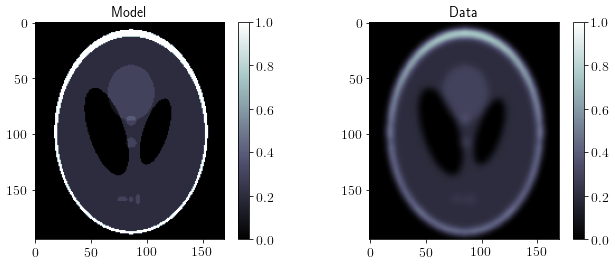

In [4]:
G = occamypy.torch.GaussianFilter(x, [3,3])
d = G * x

plt.figure(figsize=(11, 4))
plt.subplot(121), plt.title('Model')
plt.imshow(x.plot(), cmap='bone', vmin=0, vmax=1), plt.colorbar()
plt.subplot(122), plt.title('Data')
plt.imshow(d.plot(), cmap='bone', vmin=0, vmax=1), plt.colorbar()
plt.show()

As regularizer, we compute the gradient.

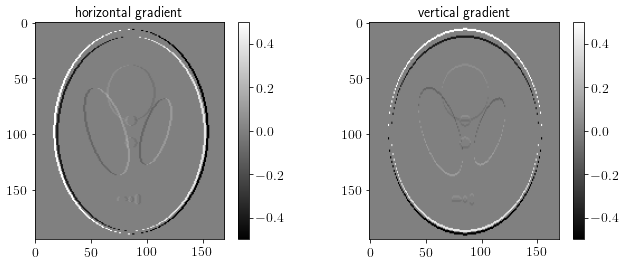

In [5]:
D = occamypy.Gradient(x)
Dx = D*x

plt.figure(figsize=(11, 4))
plt.subplot(121), plt.title('horizontal gradient')
plt.imshow(Dx.vecs[1].plot(), cmap='gray'), plt.colorbar()
plt.subplot(122), plt.title('vertical gradient')
plt.imshow(Dx.vecs[0].plot(), cmap='gray'), plt.colorbar()
plt.show()

Problem and solver:

In [6]:
problemSB = occamypy.GeneralizedLasso(x.clone().zero(), d, G, reg=D, eps=1e-3)
SB = occamypy.SplitBregman(occamypy.BasicStopper(niter=200), niter_inner=3, niter_solver=10,
                           linear_solver='LSQR', breg_weight=1., warm_start=True)
SB.setDefaults(save_obj=True)
SB.run(problemSB, verbose=True, inner_verbose=False)

##########################################################################################
			SPLIT-BREGMAN ALGORITHM

	Restart folder: /tmp/restart_2021-02-04T14-44-19.251347/
	Modeling Operator:	GausFilt
	Inner iterations:	3
	Solver iterations:	10
	L1 Regularizer op:	Gradient
	L1 Regularizer weight:	1.00e-03
	Bregman update weight:	1.00e+00
	Using warm start option for inner problem
##########################################################################################

iter = 000, obj = 7.21397e+02, df_obj = 7.21e+02, reg_obj = 0.00e+00, resnorm = 3.80e+01
iter = 001, obj = 1.56842e+00, df_obj = 2.37e-02, reg_obj = 1.54e+00, resnorm = 1.26e+01
iter = 002, obj = 1.59997e+00, df_obj = 7.93e-03, reg_obj = 1.59e+00, resnorm = 1.34e+01
iter = 003, obj = 1.61106e+00, df_obj = 4.38e-03, reg_obj = 1.61e+00, resnorm = 1.37e+01
iter = 004, obj = 1.62316e+00, df_obj = 2.92e-03, reg_obj = 1.62e+00, resnorm = 1.39e+01
iter = 005, obj = 1.62704e+00, df_obj = 2.15e-03, reg_obj = 1.62e+00, resno

iter = 087, obj = 1.41015e+00, df_obj = 8.51e-05, reg_obj = 1.41e+00, resnorm = 1.59e+01
iter = 088, obj = 1.40867e+00, df_obj = 8.43e-05, reg_obj = 1.41e+00, resnorm = 1.60e+01
iter = 089, obj = 1.40718e+00, df_obj = 8.36e-05, reg_obj = 1.41e+00, resnorm = 1.60e+01
iter = 090, obj = 1.40575e+00, df_obj = 8.29e-05, reg_obj = 1.41e+00, resnorm = 1.60e+01
iter = 091, obj = 1.40430e+00, df_obj = 8.22e-05, reg_obj = 1.40e+00, resnorm = 1.60e+01
iter = 092, obj = 1.40291e+00, df_obj = 8.15e-05, reg_obj = 1.40e+00, resnorm = 1.60e+01
iter = 093, obj = 1.40148e+00, df_obj = 8.08e-05, reg_obj = 1.40e+00, resnorm = 1.60e+01
iter = 094, obj = 1.40011e+00, df_obj = 8.01e-05, reg_obj = 1.40e+00, resnorm = 1.60e+01
iter = 095, obj = 1.39871e+00, df_obj = 7.95e-05, reg_obj = 1.40e+00, resnorm = 1.60e+01
iter = 096, obj = 1.39737e+00, df_obj = 7.89e-05, reg_obj = 1.40e+00, resnorm = 1.60e+01
iter = 097, obj = 1.39601e+00, df_obj = 7.83e-05, reg_obj = 1.40e+00, resnorm = 1.60e+01
iter = 098, obj = 1.3

iter = 180, obj = 1.32336e+00, df_obj = 5.01e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 181, obj = 1.32279e+00, df_obj = 5.00e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 182, obj = 1.32227e+00, df_obj = 4.98e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 183, obj = 1.32171e+00, df_obj = 4.96e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 184, obj = 1.32120e+00, df_obj = 4.94e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 185, obj = 1.32065e+00, df_obj = 4.92e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 186, obj = 1.32015e+00, df_obj = 4.90e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 187, obj = 1.31962e+00, df_obj = 4.89e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 188, obj = 1.31913e+00, df_obj = 4.87e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 189, obj = 1.31860e+00, df_obj = 4.85e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 190, obj = 1.31812e+00, df_obj = 4.83e-05, reg_obj = 1.32e+00, resnorm = 1.67e+01
iter = 191, obj = 1.3

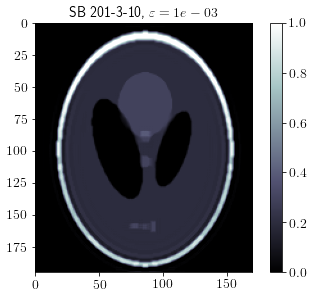

In [7]:
its = "%d-%d-%d" % (len(SB.obj), SB.niter_inner, SB.niter_solver)

plt.figure(figsize=(5, 4))
plt.imshow(problemSB.model.plot(), cmap='bone', vmin=x.min(), vmax=x.max()), plt.colorbar()
plt.tight_layout(pad=.5)

plt.title(r'SB %s, $\varepsilon=%.e$' % (its, problemSB.eps))
plt.show()

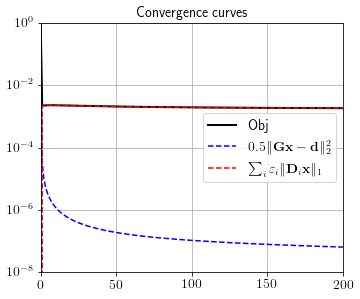

In [8]:
plt.figure(figsize=(5, 4))
plt.semilogy(SB.obj / SB.obj[0], 'k', lw=2, label='Obj')
plt.semilogy(SB.obj_terms[:, 0] / SB.obj[0], 'b--', label=r"$0.5 \Vert \mathbf{Gx-d} \Vert_2^2$")
plt.semilogy(SB.obj_terms[:, 1] / SB.obj[0], 'r--', label=r"$\sum_i\varepsilon_i \Vert \mathbf{D}_i\mathbf{x}\Vert_1$")
plt.legend(loc='right'), plt.grid(True)
plt.xlim(0, 200), plt.ylim(1e-8,1)
plt.tight_layout(pad=.5)

plt.title('Convergence curves')
plt.show()